## UDACITY PROJECT 1: Predicting Annual County Business Applications By GDP


In [149]:
#IMPORT PACKAGES
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Gather

Dataset details:
1) GDP growth (current US$) for U.S. only from World Bank Group https://data.worldbank.org/
2) U.S. Business Applications by County from U.S. Census Bureau

In [150]:
def read_data(path, df, heading=0, skip=None, na=None):
    """
    returns dataframe for file
    
    input:
            path: file path that needs to be imported as dataframe
            header: specifies header row (optional)
            skip: specifies rows to skip (optional)
            na: specifies which values to set as Null
    
    output:
            df: dataframe variable

    """

    if '.xls' in path:
        df = pd.read_excel(path, header = heading, skiprows=skip, na_values=na)
    elif '.csv' in path:
        df = pd.read_csv(path, header = heading, skiprows=skip, na_values=na)
    else:
        print('Error - unsupported file type')

    return df

In [151]:
#county data
#df_county = pd.read_excel('bfs_county_apps_annual.xlsx', header=2, skiprows=0, na_values=[' ']) #need to set row 3 as the header
read_data('bfs_county_apps_annual.xlsx', df_county, heading=2, skip=0, na=[' '])
print(df_county.head)


<bound method NDFrame.head of      State             County  County Code  fipstate  fipscty  BA2005  BA2006  \
0       AL     Autauga County         1001         1        1   335.0   348.0   
1       AL     Baldwin County         1003         1        3  1986.0  2101.0   
2       AL     Barbour County         1005         1        5   138.0   179.0   
3       AL        Bibb County         1007         1        7   118.0   145.0   
4       AL      Blount County         1009         1        9   315.0   323.0   
...    ...                ...          ...       ...      ...     ...     ...   
3151    WY  Sweetwater County        56037        56       37   334.0   341.0   
3152    WY       Teton County        56039        56       39   621.0   611.0   
3153    WY       Uinta County        56041        56       41   155.0   175.0   
3154    WY    Washakie County        56043        56       43    67.0    70.0   
3155    WY      Weston County        56045        56       45    39.0    44.0  

In [152]:
#read indicators file
#df_indicators = pd.read_csv('popular_indicators.csv')
read_data('bfs_county_apps_annual.xlsx', df_indicators)
print(df_indicators.head)

<bound method NDFrame.head of                                           Series Name        Series Code  \
0                                   Population, total        SP.POP.TOTL   
1                        Population growth (annual %)        SP.POP.GROW   
2                               Surface area (sq. km)     AG.SRF.TOTL.K2   
3   Poverty headcount ratio at national poverty li...        SI.POV.NAHC   
4                     GNI, Atlas method (current US$)     NY.GNP.ATLS.CD   
5          GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD   
6                  GNI, PPP (current international $)  NY.GNP.MKTP.PP.CD   
7       GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
8                     Income share held by lowest 20%     SI.DST.FRST.20   
9             Life expectancy at birth, total (years)     SP.DYN.LE00.IN   
10           Fertility rate, total (births per woman)     SP.DYN.TFRT.IN   
11  Adolescent fertility rate (births per 1,000 wo...     

# Assess

In [153]:
#Investigate county business application data
df_county.describe()

,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
count,3156.00000,3156.000000,3156.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3143.000000,3143.000000,3144.000000,3144.000000
mean,30307.92237,30.204056,103.866603,792.016545,837.106268,839.093541,814.916640,766.293668,787.848234,812.110722,...,856.809039,890.133673,938.439847,1011.239338,1107.864736,1112.822724,1384.374165,1714.007000,1607.755725,1733.757634
std,15203.31419,15.185327,107.796487,3138.978459,3321.163463,3360.811926,3264.302054,3077.820308,3205.128386,3343.151329,...,3621.910203,3748.605522,3893.703867,4134.967761,4562.161262,4601.392049,5918.449750,7086.108271,6409.081677,6947.662716
min,1001.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18160.50000,18.000000,35.000000,62.000000,65.000000,63.000000,62.000000,57.000000,58.000000,61.000000,...,59.000000,61.000000,62.000000,66.000000,68.000000,69.000000,78.000000,102.000000,101.750000,110.000000
50%,29166.00000,29.000000,79.000000,141.000000,151.000000,147.000000,141.000000,132.000000,134.000000,137.000000,...,135.000000,137.000000,144.000000,152.000000,161.000000,165.000000,194.000000,253.000000,252.000000,269.000000
75%,45077.50000,45.000000,133.500000,392.500000,415.000000,409.500000,395.000000,365.500000,365.000000,372.500000,...,379.750000,392.000000,412.000000,444.500000,468.000000,489.000000,572.000000,746.000000,731.250000,780.250000
max,56045.00000,56.000000,840.000000,89736.000000,93929.000000,95440.000000,90240.000000,83281.000000,85366.000000,90629.000000,...,101758.000000,104679.000000,106674.000000,111876.000000,126893.000000,128114.000000,157998.000000,179062.000000,161049.000000,180178.000000


In [154]:
#Investigate GDP data
df_indicators[df_indicators['Series Name']=='GDP (current US$)'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 25 to 25
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    1 non-null      object
 1   Series Code    1 non-null      object
 2   Country Name   1 non-null      object
 3   Country Code   1 non-null      object
 4   2000 [YR2000]  1 non-null      object
 5   2001 [YR2001]  1 non-null      object
 6   2002 [YR2002]  1 non-null      object
 7   2003 [YR2003]  1 non-null      object
 8   2004 [YR2004]  1 non-null      object
 9   2005 [YR2005]  1 non-null      object
 10  2006 [YR2006]  1 non-null      object
 11  2007 [YR2007]  1 non-null      object
 12  2008 [YR2008]  1 non-null      object
 13  2009 [YR2009]  1 non-null      object
 14  2010 [YR2010]  1 non-null      object
 15  2011 [YR2011]  1 non-null      object
 16  2012 [YR2012]  1 non-null      object
 17  2013 [YR2013]  1 non-null      object
 18  2014 [YR2014]  1 non-null      object

# Clean

How to clean business application data? <br/><br/>
There were null values for 25 counties/regions/areas because data was not obtained certain years for business applications. I then decided to drop these from the data, so it doesn't skew anything when included
<br/><br/>
The next step will be to aggregate all of the county data into a single row to reflect the entire U.S. (minus the few counties excluded) and that way we can easily visualize if there is merit to a model that can predict business applications based on GDP

In [155]:
#check for null values for business application data
print(df_county[df_county.isna().any(axis=1)])
print(len(df_county[df_county.isna().any(axis=1)]))

     State                                          County  County Code  \
72      AK                             Chugach Census Area         2063   
73      AK                        Copper River Census Area         2066   
83      AK                            Kusilvak Census Area         2158   
94      AK                      Valdez-Cordova Census Area         2261   
95      AK                        Wade Hampton Census Area         2270   
311     CT                                Fairfield County         9001   
312     CT                                 Hartford County         9003   
313     CT                               Litchfield County         9005   
314     CT                                Middlesex County         9007   
315     CT                                New Haven County         9009   
316     CT                               New London County         9011   
317     CT                                  Tolland County         9013   
318     CT               

In [156]:
#drop null values
df_county = df_county.dropna()
print(len(df_county))

3131


In [157]:
#drop unnecessary columns and sum all counties to make up U.S. aggregate for business application data
df_country_sum = df_county.drop(['State','County', 'County Code', 'fipstate','fipscty'],axis=1)
country_sum = df_country_sum.sum(axis=0)
df_country_sum.loc['Sum'] = country_sum
y = df_country_sum.loc['Sum']
print(y)


BA2005    2460747.0
BA2006    2600175.0
BA2007    2607291.0
BA2008    2532754.0
BA2009    2382447.0
BA2010    2449797.0
BA2011    2526326.0
BA2012    2525140.0
BA2013    2566730.0
BA2014    2665401.0
BA2015    2770459.0
BA2016    2920839.0
BA2017    3147092.0
BA2018    3446782.0
BA2019    3463479.0
BA2020    4313676.0
BA2021    5339666.0
BA2022    5009980.0
BA2023    5402786.0
Name: Sum, dtype: float64


Now we can clean the indicators data:
1) The business applications data only has data from 2005 and onwards so we can remove the data from 2000-2004 in the indicators file
2) Select only the GDP (current US$ indicator)

In [158]:
#drop years 2000-2004
df_indicators = df_indicators.drop(['2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','Series Code','Country Name','Country Code'], axis=1)

In [159]:
#filter to only GDP indicator
df_gdp = df_indicators[df_indicators['Series Name']=='GDP (current US$)']
df_gdp = df_gdp.drop(['Series Name'],axis=1)
df_gdp = df_gdp.astype(float)
print(df_gdp)

    2005 [YR2005]  2006 [YR2006]  2007 [YR2007]  2008 [YR2008]  2009 [YR2009]  \
25   1.303920e+13   1.381558e+13   1.447423e+13   1.476986e+13   1.447807e+13   

    2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  2013 [YR2013]  2014 [YR2014]  \
25   1.504897e+13   1.559973e+13   1.625397e+13   1.688068e+13   1.760814e+13   

    2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  2019 [YR2019]  \
25   1.829502e+13   1.880491e+13   1.961210e+13   2.065652e+13   2.153998e+13   

    2020 [YR2020]  2021 [YR2021]  2022 [YR2022]  2023 [YR2023]  
25   2.135410e+13   2.368117e+13   2.600689e+13   2.772071e+13  


In [160]:
#convert the one row of GDP to a dataframe
X = df_gdp.iloc[0].to_frame()
print(X)

                         25
2005 [YR2005]  1.303920e+13
2006 [YR2006]  1.381558e+13
2007 [YR2007]  1.447423e+13
2008 [YR2008]  1.476986e+13
2009 [YR2009]  1.447807e+13
2010 [YR2010]  1.504897e+13
2011 [YR2011]  1.559973e+13
2012 [YR2012]  1.625397e+13
2013 [YR2013]  1.688068e+13
2014 [YR2014]  1.760814e+13
2015 [YR2015]  1.829502e+13
2016 [YR2016]  1.880491e+13
2017 [YR2017]  1.961210e+13
2018 [YR2018]  2.065652e+13
2019 [YR2019]  2.153998e+13
2020 [YR2020]  2.135410e+13
2021 [YR2021]  2.368117e+13
2022 [YR2022]  2.600689e+13
2023 [YR2023]  2.772071e+13


# Analyze

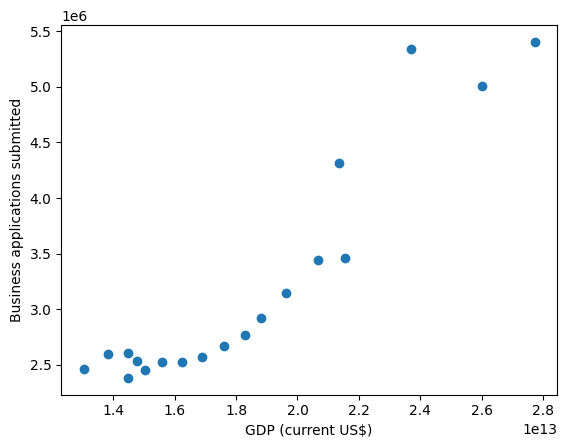

In [161]:
#scatter plot of US GDP and new business applications to spot check possible linearity
plt.scatter(X,y)
plt.xlabel('GDP (current US$)')
plt.ylabel('Business applications submitted')  
plt.show()

# Model

How to choose the appropriate ML model to predict business applications based on GDP? <br/><br/>
Linear regression is the most appropriate predictive model for this situation. It is the best low-cost model in this case to predict because we have numerical independent variable (GDP) and dependent variable (business applications) and we need a continuous output to be able to make predictions with new inputs. Also based on the scatter plot, it is reasonable to assume a linear relationship at this time.

In [162]:
#Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [163]:
#Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
#predictions from train and test data
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

y_prediction = model.predict(X)

In [165]:
#Root mean squared error
from sklearn.metrics import root_mean_squared_error
rmse_train = root_mean_squared_error(y_train, y_train_prediction)
print(rmse_train)
rmse_test = root_mean_squared_error(y_test,y_test_prediction)
print(rmse_test)

373995.5504610165
343184.2842113388


In [166]:
#r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y,y_prediction)
print(r2)

0.8638233706362023


# Visualize

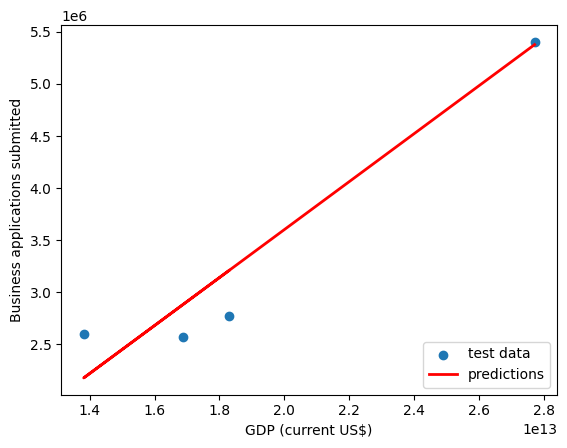

In [167]:
#visualize scatter plot of test data with test linear regression 
plt.scatter(X_test,y_test, label = 'test data')
plt.plot(X_test,y_test_prediction, color='red',linewidth=2, label = 'predictions')
plt.xlabel('GDP (current US$)')
plt.ylabel('Business applications submitted')
plt.legend(loc='lower right')
plt.show()

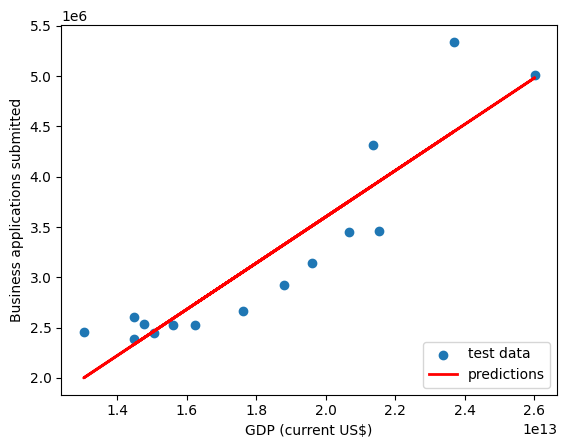

In [168]:
#scatter plot with all X train data and trained regression model
plt.scatter(X_train,y_train, label = 'test data')
plt.plot(X_train,y_train_prediction, color='red',linewidth=2, label = 'predictions')
plt.xlabel('GDP (current US$)')
plt.ylabel('Business applications submitted')
plt.legend(loc='lower right')
plt.show()

Making predictions now that we have linear regression model <br/><br/>

Let's assume in the year 2025, the GDP of the US grows to $29 trillion

In [169]:
y_prediction_2025 = model.predict([[2.9 * 10**13]])
print(f"The model predicts that in 2025 the US will have {y_prediction_2025[0]:.0f} business applications")

The model predicts that in 2025 the US will have 5671166 business applications


How to interpret results?<br/><br/>
1. The linear regression model performed okay based on the RSME and R2 scores <br/>
2. The model would be considered underfit based on the lower R2 score and higher RSME, but it would not be considered overfit based on similar RSME for test and train data <br/>
3. The prediction for 2025 given the GDP seemed reasonable

<br/><br/>
Future work? <br/><br/>
1. Investigate other economic indicators and determine correlation between those variables. This could possibly lead to multi-variable regression <br/>
2. Breakdown GDP by each county if the data is out there to determine predictive model